**Example code 18: Simulate the molecular cloning process of pCMV-Target-AID**  
Simulate the construction process of pCMV-Target-AID plasmid. The Target-AID plasmid (pCMV-Target-AID) was constructed by assembling two fragments encoding the N- and C-terminus halves of Target-AID, which were both amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129 and HM128/RS046, respectively, with a backbone fragment amplified from pCMV-ABE7.10 using RS047/RS048. By using leavecomment, the following script allows to leave comments for each operational functions block represent an experimental process.  

In [1]:
import sys 
sys.path.append("../../")
from dna import *
#Read template plasimid GenBank inputs
pCMV_ABE             = DNA(record="input/addgene_102919.gbk",project="pCMV_ABE")
pCMV_nCas_PmCDA1_ugi = DNA(record="input/addgene_79620.gbk", project="pCMV-nCas-PmCDA1-ugi")

#Simulate PCR to amlify N-terminus of Target-AID
description1 = "The N-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT)\
 (Addgene 79620) using primer pairs RS045/HM129"
RS045 = "GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG"
HM129 = "CTGGGGCACGATATGATCCACGTCGTAGTCGGAGA"
FW    = pCMV_nCas_PmCDA1_ugi.finddna(RS045[-18:], key_attribute="sequence") #Search FW primer binding region
RV    = pCMV_nCas_PmCDA1_ugi.finddna(HM129[-18:], key_attribute="sequence") #Search RV primer binding region
frag1 = cropdna(pCMV_nCas_PmCDA1_ugi, *FW, *RV, process_description=description1)
frag1 = modifyends(frag1, RS045, flipdna(HM129), process_description=description1) #Simulate PCR

#Simulate PCR to amlify C-terminus of Target-AID
description2 = "The C-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT)\
 (Addgene 79620) using primer pairs HM128/RS046"
HM128 = "CTACGACGTGGATCATATCGTGCCCCAGTCTTTTC"
RS046 = "TTTAAACTCATTATAGCATCTTGATCTTGTTCTCTC"
FW    = pCMV_nCas_PmCDA1_ugi.finddna(HM128[-18:], key_attribute="sequence")
RV    = pCMV_nCas_PmCDA1_ugi.finddna(RS046[-18:], key_attribute="sequence")
frag2 = cropdna(pCMV_nCas_PmCDA1_ugi, *FW, *RV, process_description=description2)
frag2 = modifyends(frag2, HM128, flipdna(RS046), process_description=description2)

#Simulate PCR to amplify a backbone fragment
description3 = "The backbone fragment was amplified from pCMV-ABE7.10 using RS047/RS048"
RS047  = "ATCAAGATGCTATAATGAGTTTAAACCCGCTGATC" 
RS048  = "CTTCGGTGCCATGGTGGCGGCTCTCCCTATAG"
FW     = pCMV_ABE.finddna(RS047[-18:], key_attribute="sequence") 
RV     = pCMV_ABE.finddna(RS048[-18:], key_attribute="sequence")
frag3  = cropdna(pCMV_ABE, *FW, *RV, process_description=description3)
frag3  = modifyends(frag3, RS047, flipdna(RS048), process_description=description3)

#Gibson Assembly
description4 = "The Target-AID plasmid (pCMV-Target-AID) was constructed\
 by assembling two insert fragments and a backbone fragments."
frag1 = modifyends(frag1, "*{25}/-{25}","-{28}/*{28}", process_description=description4)
frag2 = modifyends(frag2, "*{28}/-{28}","-{25}/*{25}", process_description=description4)
frag3 = modifyends(frag3, "*{25}/-{25}","-{25}/*{25}", process_description=description4) 
pCMV_Target_AID = joindna(frag1, frag2, frag3, topology="circular", project="pCMV-Target-AID", process_description=description4)

#Add primer information
"""
primers = [RS045,HM129,RS046,HM128,RS047,RS048]
for primer in primers:
    feature_id = primer.project
    editdna(pCMV_Target_AID, query=primer, key_attribute="sequence", target_attribute="feature_id", operation=createattribute(feature_id), new_copy=False)
    editdna(pCMV_Target_AID, query=feature_id, key_attribute="feature_id", target_attribute="feature_type", operation=replaceattribute("primer_bind"), new_copy=False)
    editdna(pCMV_Target_AID, query=feature_id, key_attribute="feature_id", target_attribute="qualifier:label", operation=createattribute(feature_id), new_copy=False)
"""
pCMV_Target_AID.writedna("output/pCMV-Target-AID.gbk")
pCMV_Target_AID.printfeature()

feature_id  qualifier:label     feature_type  start  end   strand  
3100        pCMV-Target-AID     source        0      8752  +       
100         SV40 NLS            CDS           33     40    +       
200         null                source        33     5363  +       
300         Cas9(D10A)          CDS           64     4168  +       
500         SV40 NLS            CDS           4180   4201  +       
600         3xFLAG              CDS           4408   4474  +       
700         SV40 NLS            CDS           5107   5128  +       
800         UGI                 CDS           5134   5363  +       
1000        null                source        5409   8745  +       
1100        BGH-rev             primer_bind   5411   5429  -       
1200        bGH poly(A) signal  polyA_signal  5417   5642  +       
1300        M13 rev             primer_bind   5712   5729  -       
1400        M13 Reverse         primer_bind   5712   5729  -       
1500        M13/pUC Reverse     primer_bind   57

In [2]:
pCMV_Target_AID = DNA(record="output/pCMV-Target-AID.gbk")
exporthistory(pCMV_Target_AID)

#import sys
#sys.path.append("../../")
from dna import *
DNA.dna_dict['pCMV_ABE'] = DNA(seq=None, record='input/addgene_102919.gbk', project='pCMV_ABE', topology='linear', format=None, process_description=None)
DNA.dna_dict['pCMV-nCas-PmCDA1-ugi'] = DNA(seq=None, record='input/addgene_79620.gbk', project='pCMV-nCas-PmCDA1-ugi', topology='linear', format=None, process_description=None)

description0 = 'The N-terminus of Target-AID was amplified from pcDNA3.1_pCMV-nCas-PmCDA1-ugi pH1-gRNA(HPRT) (Addgene 79620) using primer pairs RS045/HM129'
DNA.dna_dict['pCMV-nCas-PmCDA1-ugi_0'] = cropdna(DNA.dna_dict['pCMV-nCas-PmCDA1-ugi'], start='3914/3914', end='6442/6442', project='pCMV-nCas-PmCDA1-ugi', process_description=description0)
DNA.dna_dict['pCMV-nCas-PmCDA1-ugi_1'] = modifyends(DNA.dna_dict['pCMV-nCas-PmCDA1-ugi_0'], left='GAGAGCCGCCACCATGGCACCGAAGAAGAAGCG', right='TCTCCGACTACGACGTGGATCATATCGTGCCCCAG', project='pCMV-nCas-PmCDA1-ugi', process_description=description0)

description1 = 'The

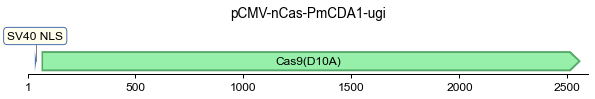

In [3]:
fig1=visualize(frag1)

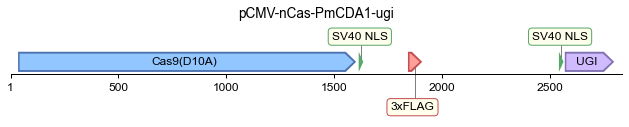

In [4]:
fig2=visualize(frag2)

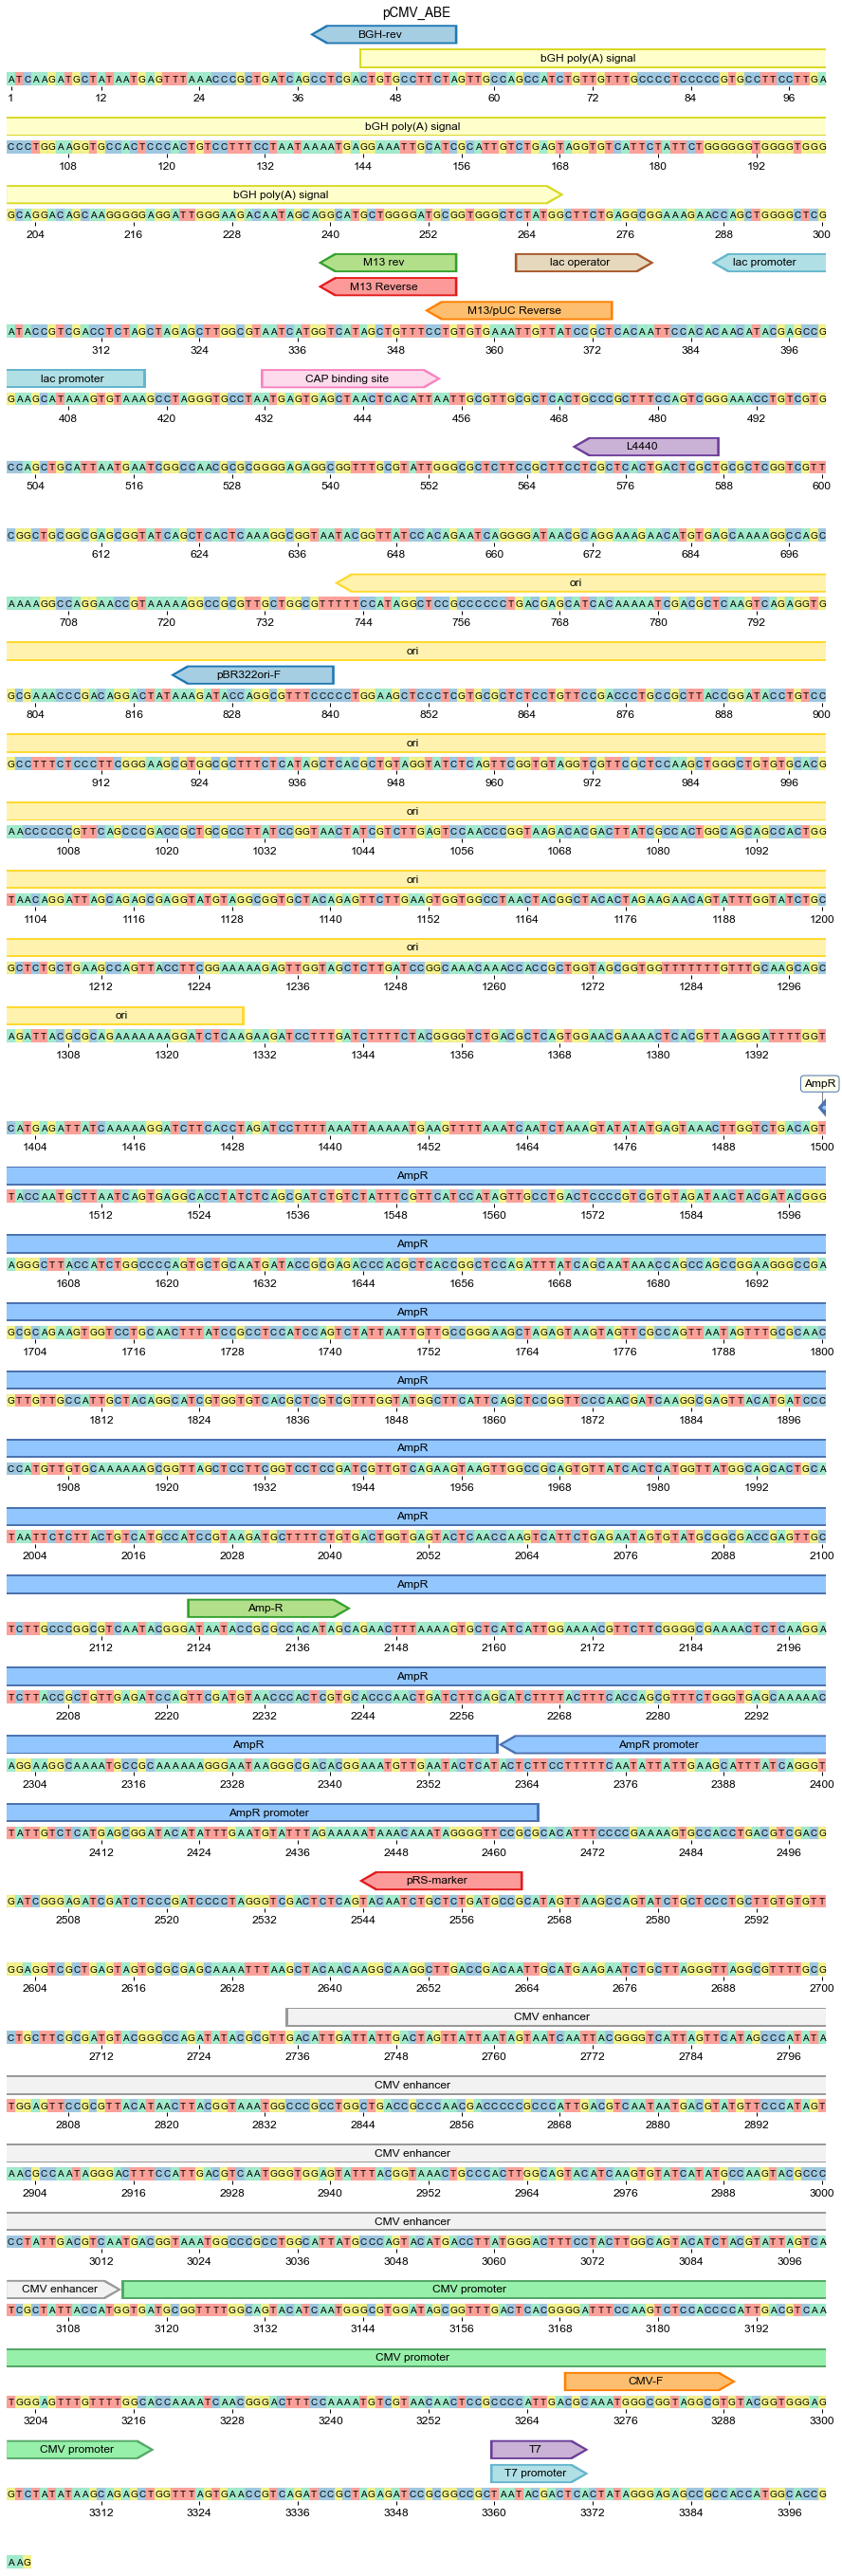

In [5]:
fig3=visualize(frag3, linebreak=100, seq=True)

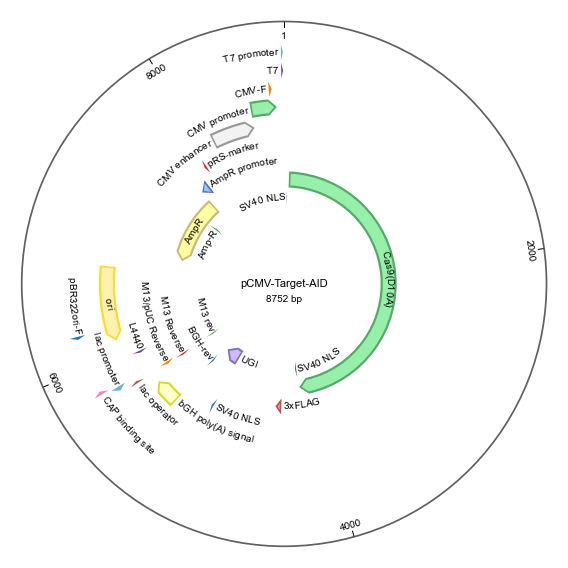

In [6]:
fig4 = visualize(pCMV_Target_AID, map_view="circular")
#fig1.savefig("fig1.pdf", bbox_inches="tight")
#fig2.savefig("fig2.pdf", bbox_inches="tight")
#fig3.savefig("fig3.pdf", bbox_inches="tight")
#fig4.savefig("fig4.pdf", bbox_inches="tight")